In [11]:
from itertools import accumulate
import matplotlib.pyplot as plt
from math import inf,log,sqrt
from scipy.stats import norm
from statistics import mean,variance

In [2]:
class sumstats :
    def __init__(self,X) :
        self.X = X
        self.SX = [0] + list(accumulate(X))
        self.SXX = [0] + list(accumulate([x*x for x in X]))

In [3]:
class normal_mean :
    def __init__(self,X) :
        self.sumstats = sumstats(X)
    def __call__(self,i,j) :
        val = self.sumstats.SX[j+1] - self.sumstats.SX[i]
        val *= val
        val /= (j - i + 1)
        val = -val
        val += self.sumstats.SXX[j+1] - self.sumstats.SXX[i]
        return val

In [4]:
class functor :
    def __init__(self) :
        self.D = {}
    def add(self,x,y) :
        self.D[x] = y
    def __call__(self,*x) :
        return self.D[x]

In [5]:
def amoc(f,g,a,b) :
    cost = [g(a,b)] + [f(a,i) + g(i+1,b) for i in range(a,b)]
    min_cost = min(cost)
    loc = cost.index(min_cost)
    return (min_cost,loc)

In [6]:
def op(X,cost,beta) :
    G = cost(X)
    F = functor()
    locations = []
    for i in range(len(X)) :
        min_cost,loc = amoc(F,G,0,i)
        locations.append(loc)
        if G(0,i) - min_cost > beta :
            F.add((0,i),min_cost + beta)
        else :
            F.add((0,i),G(0,i))
    return locations

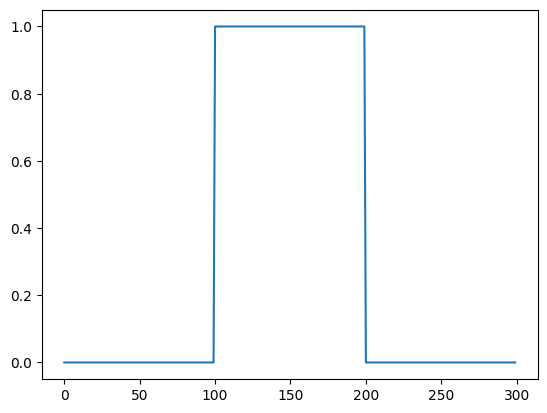

In [7]:
X = [0 for i in range(100)] + [1 for i in range(100)] + [0 for i in range(100)]
plt.plot(X)
plt.show()

In [8]:
beta = 2*log(len(X))
locs = op(X,normal_mean,beta)

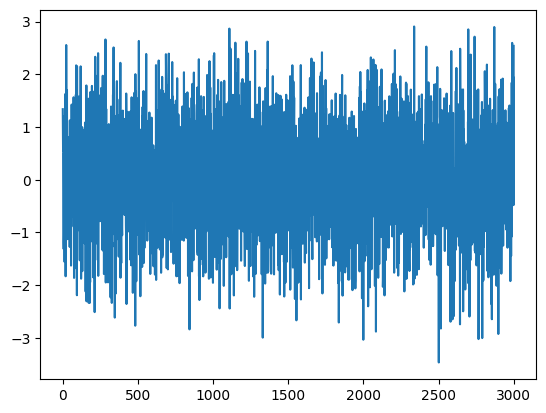

In [84]:
X = [0 for i in range(1000)] + [0 for i in range(1000)]  + [0 for i in range(1000)]
E = norm.rvs(size=3000)
Z = [x+e for x,e in zip(X,E)]
mu = mean(Z)
sigma = sqrt(variance(Z))
Z = [(z-mu)/sigma for z in Z]
plt.plot(Z)
plt.show()

In [85]:
beta = 2*log(len(Z))
locs = op(Z,normal_mean,beta)

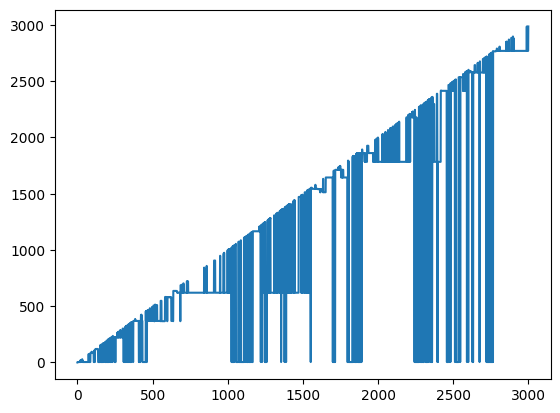

In [86]:
plt.plot(locs)

In [83]:
G = normal_mean(Z)
amoc(G,G,0,len(Z)-1)

(2863.7666263491483, 2000)

In [75]:
G(0,len(Z)-1)

998.9999999999984

In [76]:
2*log(len(Z))

13.815510557964274